In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm

plt.style.use('ggplot')

In [56]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to C:\Users\Harold Uribe
[nltk_data]     Romero\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Harold Uribe
[nltk_data]     Romero\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Harold
[nltk_data]     Uribe Romero\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Harold Uribe
[nltk_data]     Romero\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [57]:
folder = "../factored-datathon-2023-data-science-rockstars/GroupedAndGames/games"

In [58]:
files = [file for file in os.listdir(folder) if file.endswith('.gzip')]

In [59]:
# Leer todos los archivos y almacenarlos en una lista
dataframes = []
for file in files:
    ruta_archivo = os.path.join(folder, file)
    df = pd.read_parquet(ruta_archivo, engine='fastparquet')
    dataframes.append(df)

# Combinar los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)
df['id'] = df.reset_index().index

In [60]:
files

['final_df_games_1_1.gzip', 'final_df_games_1_2.gzip']

In [61]:
df.shape

(1257815, 10)

In [62]:
df.head()

,asin,overall,reviewText,reviewerID,summary,verified,style,vote,YearMonth,id
0,B00005QDQ1,4,We really liked this game years ago so we were...,A1K8PBV6CDUSVC,We really liked this game years ago so we were...,True,"{""Platform:"":"" GameCube""}",0,201702,0
1,B00005QDQ1,5,Great product:) love this game,A31573ZF0O4OET,Five Stars,True,"{""Platform:"":"" GameCube""}",0,201701,1
2,B00005QDQ1,5,Wonderful game. It's such a fun and addicting ...,AY7KR50KFPMSY,Wonderful game. It's such a fun and addicting ...,True,"{""Platform:"":"" GameCube""}",0,201701,2
3,B00005QDQ1,1,"the game never worked for me, too scratched up.",A3B6S9V2ZVF7BH,One Star,True,"{""Platform:"":"" GameCube""}",0,201612,3
4,B00005QDQ1,5,"Everything, including the game, was in good co...",A1X7BL5ES784U6,was in good condition and had no problems working,True,"{""Platform:"":"" GameCube""}",0,201611,4


In [63]:
df['reviewText'].values[4]

'Everything, including the game, was in good condition and had no problems working.'

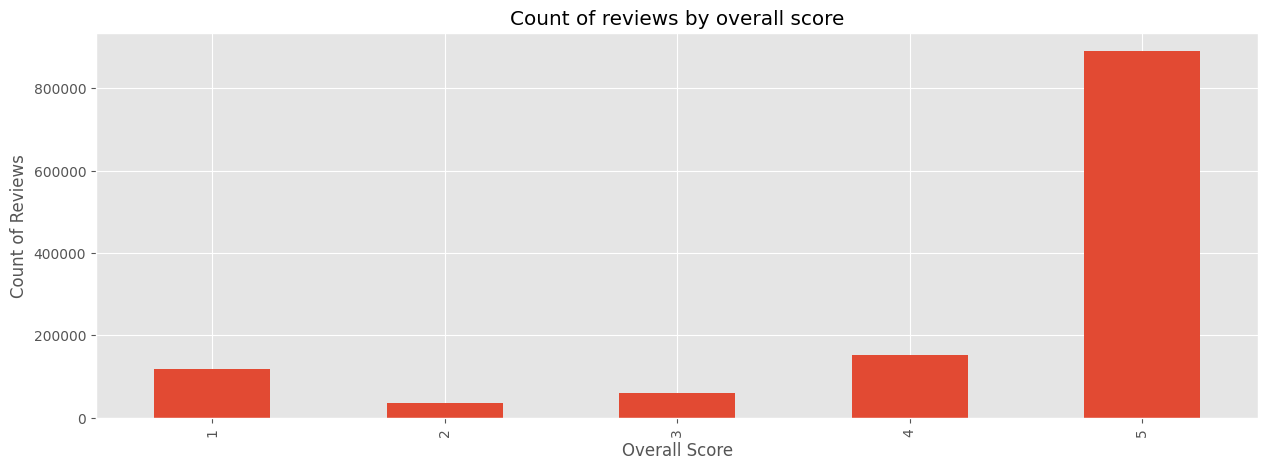

In [64]:
ax = df['overall'].value_counts().sort_index().plot\
    (kind='bar',title = 'Count of reviews by overall score',figsize=(15, 5))

ax.set_xlabel("Overall Score")
ax.set_ylabel("Count of Reviews")
plt.show()

In [65]:
example = df['reviewText'][0]
example

'We really liked this game years ago so we were very excited to get it. Unfortunately the disk would get to the start screen and then we would get the disk cannot be read error. We followed the instructions in the booklet for cleaning and it still would not play. So we returned it for a full refund. Since we really liked the game in the past I gave it four stars.'

In [66]:
tokens = nltk.word_tokenize(example)
type(tokens)

list

In [67]:
tagged = nltk.pos_tag(tokens)
tagged

[('We', 'PRP'),
 ('really', 'RB'),
 ('liked', 'VBD'),
 ('this', 'DT'),
 ('game', 'NN'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('so', 'IN'),
 ('we', 'PRP'),
 ('were', 'VBD'),
 ('very', 'RB'),
 ('excited', 'VBN'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Unfortunately', 'RB'),
 ('the', 'DT'),
 ('disk', 'NN'),
 ('would', 'MD'),
 ('get', 'VB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('start', 'NN'),
 ('screen', 'NN'),
 ('and', 'CC'),
 ('then', 'RB'),
 ('we', 'PRP'),
 ('would', 'MD'),
 ('get', 'VB'),
 ('the', 'DT'),
 ('disk', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('be', 'VB'),
 ('read', 'VBN'),
 ('error', 'NN'),
 ('.', '.'),
 ('We', 'PRP'),
 ('followed', 'VBD'),
 ('the', 'DT'),
 ('instructions', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('booklet', 'NN'),
 ('for', 'IN'),
 ('cleaning', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('still', 'RB'),
 ('would', 'MD'),
 ('not', 'RB'),
 ('play', 'VB'),
 ('.', '.'),
 ('So', 'IN'),
 ('we', 'PRP'),
 ('returned', 'VBD'),
 ('it', 'PRP'),
 ('for

In [68]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  really/RB
  liked/VBD
  this/DT
  game/NN
  years/NNS
  ago/RB
  so/IN
  we/PRP
  were/VBD
  very/RB
  excited/VBN
  to/TO
  get/VB
  it/PRP
  ./.
  Unfortunately/RB
  the/DT
  disk/NN
  would/MD
  get/VB
  to/TO
  the/DT
  start/NN
  screen/NN
  and/CC
  then/RB
  we/PRP
  would/MD
  get/VB
  the/DT
  disk/NN
  can/MD
  not/RB
  be/VB
  read/VBN
  error/NN
  ./.
  We/PRP
  followed/VBD
  the/DT
  instructions/NNS
  in/IN
  the/DT
  booklet/NN
  for/IN
  cleaning/NN
  and/CC
  it/PRP
  still/RB
  would/MD
  not/RB
  play/VB
  ./.
  So/IN
  we/PRP
  returned/VBD
  it/PRP
  for/IN
  a/DT
  full/JJ
  refund/NN
  ./.
  Since/IN
  we/PRP
  really/RB
  liked/VBD
  the/DT
  game/NN
  in/IN
  the/DT
  past/JJ
  I/PRP
  gave/VBD
  it/PRP
  four/CD
  stars/NNS
  ./.)


In [69]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [70]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [71]:
example

'We really liked this game years ago so we were very excited to get it. Unfortunately the disk would get to the start screen and then we would get the disk cannot be read error. We followed the instructions in the booklet for cleaning and it still would not play. So we returned it for a full refund. Since we really liked the game in the past I gave it four stars.'

In [72]:
encoded_text = tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.13350728, 0.30459175, 0.561901  ], dtype=float32)

In [73]:
def polarity_score_roberta(text):
    """
    Returns polarity score of the text using Roberta model
    """
    encoded_text = tokenizer(text,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'negative': scores[0],
        'neutral': scores[1],
        'positive': scores[2]
    }

    return scores_dict

In [74]:
# df2=df[:int(len(df)*0.0001)]
df2 = df.sample(frac=0.1, random_state=1)
df2

,asin,overall,reviewText,reviewerID,summary,verified,style,vote,YearMonth,id
209641,B00005TNI6,5,loved it,A1MQ8S2BNGKMJ9,Five Stars,True,"{""Format:"":"" Video Game""}",0,201502,209641
242331,B000066TS5,5,another awsome game with great graphics have f...,AZOMKP7Q7B79L,fantasy gams 2,True,"{""Format:"":"" Video Game""}",0,201307,242331
764631,B000069D39,5,Was one of my favorite as a kid... Oh the memo...,AORFX6O9FI1O6,Nostaliga abound,True,"{""Platform:"":"" PlayStation2""}",0,201510,764631
786607,B00005R5PO,5,"Great condition, works perfectly.",A27XMV7PAQERVM,Five Stars,True,"{""Format:"":"" Video Game""}",0,201703,786607
1249055,B0000640A2,5,I played this game with my son when he was thr...,ALNUW46IIPZ15,Memories,True,"{""Platform:"":"" PlayStation2""}",2,201508,1249055
...,...,...,...,...,...,...,...,...,...,...
886213,B000066JRN,5,My son likes Mario brothers a lot so I order o...,A3FI8CH9N629GK,My son likes mario brothers a lot!!,True,"{""Format:"":"" Video Game""}",0,201503,886213
574301,B000066TS5,5,"Honestly, I am writing this because I feel tha...",A1L5W5VS0MKHMV,Amazing,True,"{""Format:"":"" Video Game""}",0,201205,574301
659567,B00005TS56,1,I really feel the could be so much better. The...,A1LRMIT5RUXQD4,Bad,True,"{""Platform:"":"" PC Download""}",0,201212,659567
998767,B00005V6BP,5,Came in good condition...Waiting for a compone...,A3P7J60L0F5FHD,Came in good condition.,True,"{""Platform:"":"" PlayStation2""}",0,201410,998767


In [75]:
res ={}

for i, row in tqdm(df2.iterrows(),total = len(df2)):
    try:
        try:
            try:
                text = row['reviewText']
                myid = row['id']
                # print(myid)
                roberta_result = polarity_score_roberta(text)
                res[myid] = roberta_result
            except RuntimeError:
                # print(f'Broke for id {myid}')
                continue
        except ValueError:
            # print(f'ValueError for id {myid}')
            continue
    except IndexError:
        # print(f'IndexError for id {myid}')
        continue

results_dfsample = pd.DataFrame(res).T
results_dfsample = results_dfsample.reset_index().rename(columns={'index': 'id'})
results_dfsample.to_parquet('results_dfsample.parquet')


100%|██████████| 125782/125782 [5:15:04<00:00,  6.65it/s]  


In [48]:
results_dfsample = pd.DataFrame(res).T
results

,negative,neutral,positive
209641,0.009482,0.035640,0.954878
242331,0.001535,0.007142,0.991323
764631,0.001780,0.013003,0.985216
786607,0.006377,0.066791,0.926832
1249055,0.002276,0.019207,0.978517
...,...,...,...
403427,0.009660,0.175109,0.815231
1012517,0.006522,0.106089,0.887389
885178,0.947042,0.045595,0.007364
82321,0.001989,0.004441,0.993570


In [52]:
df['reviewText'] [1249055]

'I played this game with my son when he was three. I bought it for him now when hes almost 18. He still has to ask for help. :-) Im very happy about finding this game again finally'